<h1 align='center' style='color:black'>Credit Risk Modeling Project</h1>

In [169]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

### Load Data

In [114]:
df_customers = pd.read_csv('data/customers.csv')
df_bureau_data = pd.read_csv('data/bureau_data.csv')
df_loans = pd.read_csv('data/loans.csv')

In [115]:
df_customers.shape, df_bureau_data.shape, df_loans.shape

((50000, 12), (50000, 8), (50000, 15))

In [116]:
df_customers.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001


In [117]:
df_loans.head(3)

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [118]:
df = pd.merge(df_customers, df_loans, on='cust_id')

In [119]:
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [120]:
df_bureau_data.head(3)

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58


In [121]:
df= pd.merge(df, df_bureau_data, on='cust_id')

In [122]:
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,2019-07-24,2019-08-09,False,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,2019-07-24,2019-08-02,False,4,2,120,0,0,5,10


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [124]:
df['default']= df['default'].astype(int)

In [125]:
df['default'].value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

### Train Test split

We perform train test split before doing EDA to prevent data leakage. We don't want test set (which is part of the entire dataset) to influence EDA or any decisions on feature engineering. 

In [126]:
X = df.drop('default', axis= 'columns')
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size= 0.25, random_state= 42)

df_train= pd.concat([X_train, y_train], axis= 'columns')
df_test= pd.concat([X_test, y_test], axis= 'columns')

In [127]:
df_train.shape, df_test.shape

((37500, 33), (12500, 33))

<h3 align="center" style="color:black">Data Cleaning</h3>

### Handle Missing & Duplicate Values

In [128]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [129]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [130]:
mode_residence= df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [131]:
df_train.residence_type.fillna(mode_residence, inplace=True)
df_train.residence_type.unique()

C:\Users\aksha\AppData\Local\Temp\ipykernel_29828\2089477585.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.residence_type.fillna(mode_residence, inplace=True)


array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [132]:
df_test.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [133]:
df_test.residence_type.fillna(mode_residence, inplace=True)
df_test.residence_type.unique()

C:\Users\aksha\AppData\Local\Temp\ipykernel_29828\1081862490.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test.residence_type.fillna(mode_residence, inplace=True)


array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [134]:
df_train.duplicated().sum()

0

In [135]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [136]:
columns_continuous = ['age', 'income', 'number_of_dependants', 'years_at_current_address', 'sanction_amount', 'loan_amount',
                       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months', 'principal_outstanding', 'bank_balance_at_application',
                      'number_of_open_accounts', 'number_of_closed_accounts', 'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count', 
                      'credit_utilization_ratio']

columns_categorical= ['gender', 'marital_status', 'employment_status', 'residence_type', 'city', 'state', 'zipcode',  'loan_purpose', 'loan_type'
                      ,'default']

### Box plot to visualize outliers

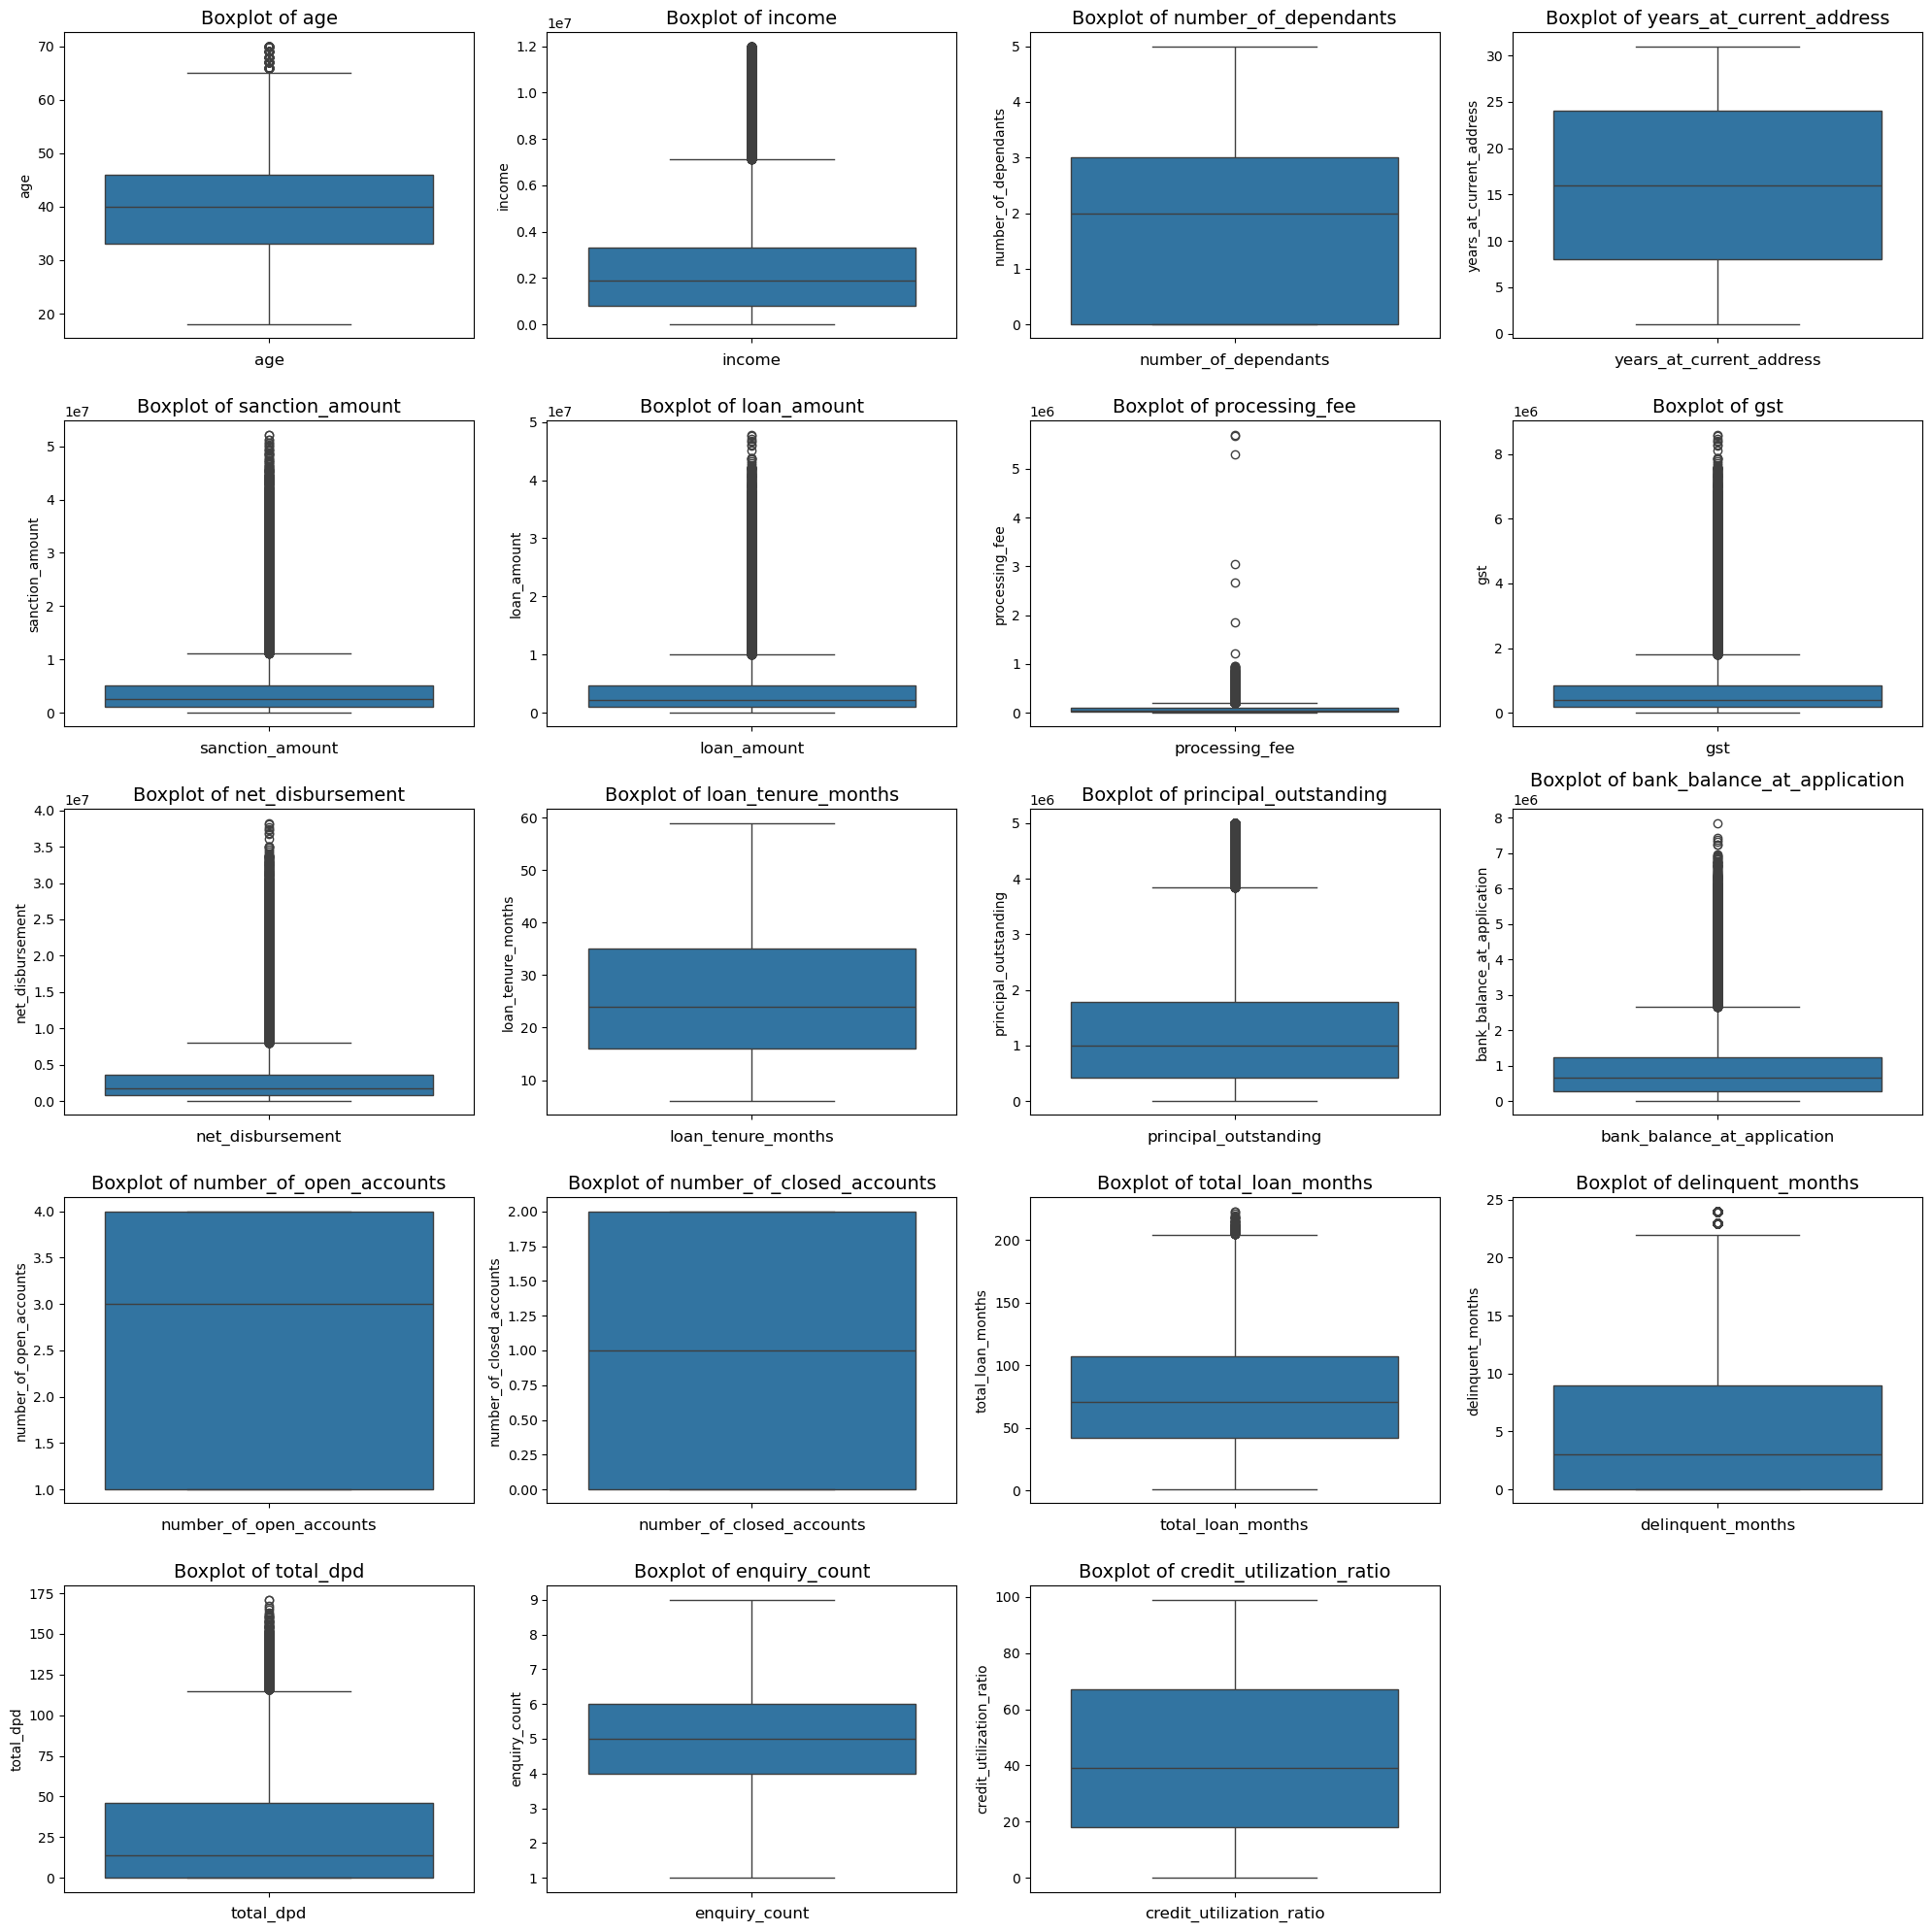

In [137]:
# Set up the figure size for better visualization
plt.figure(figsize=(20, 20))

# Determine the number of rows and columns for the subplots
n_cols = 4
n_rows = (len(columns_continuous) + n_cols - 1) // n_cols

# Loop through each column and create a boxplot
for i, column in enumerate(columns_continuous, start=1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df[column])  # Adjusted to ensure compatibility with single-variable boxplots
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)

plt.tight_layout()
plt.show()


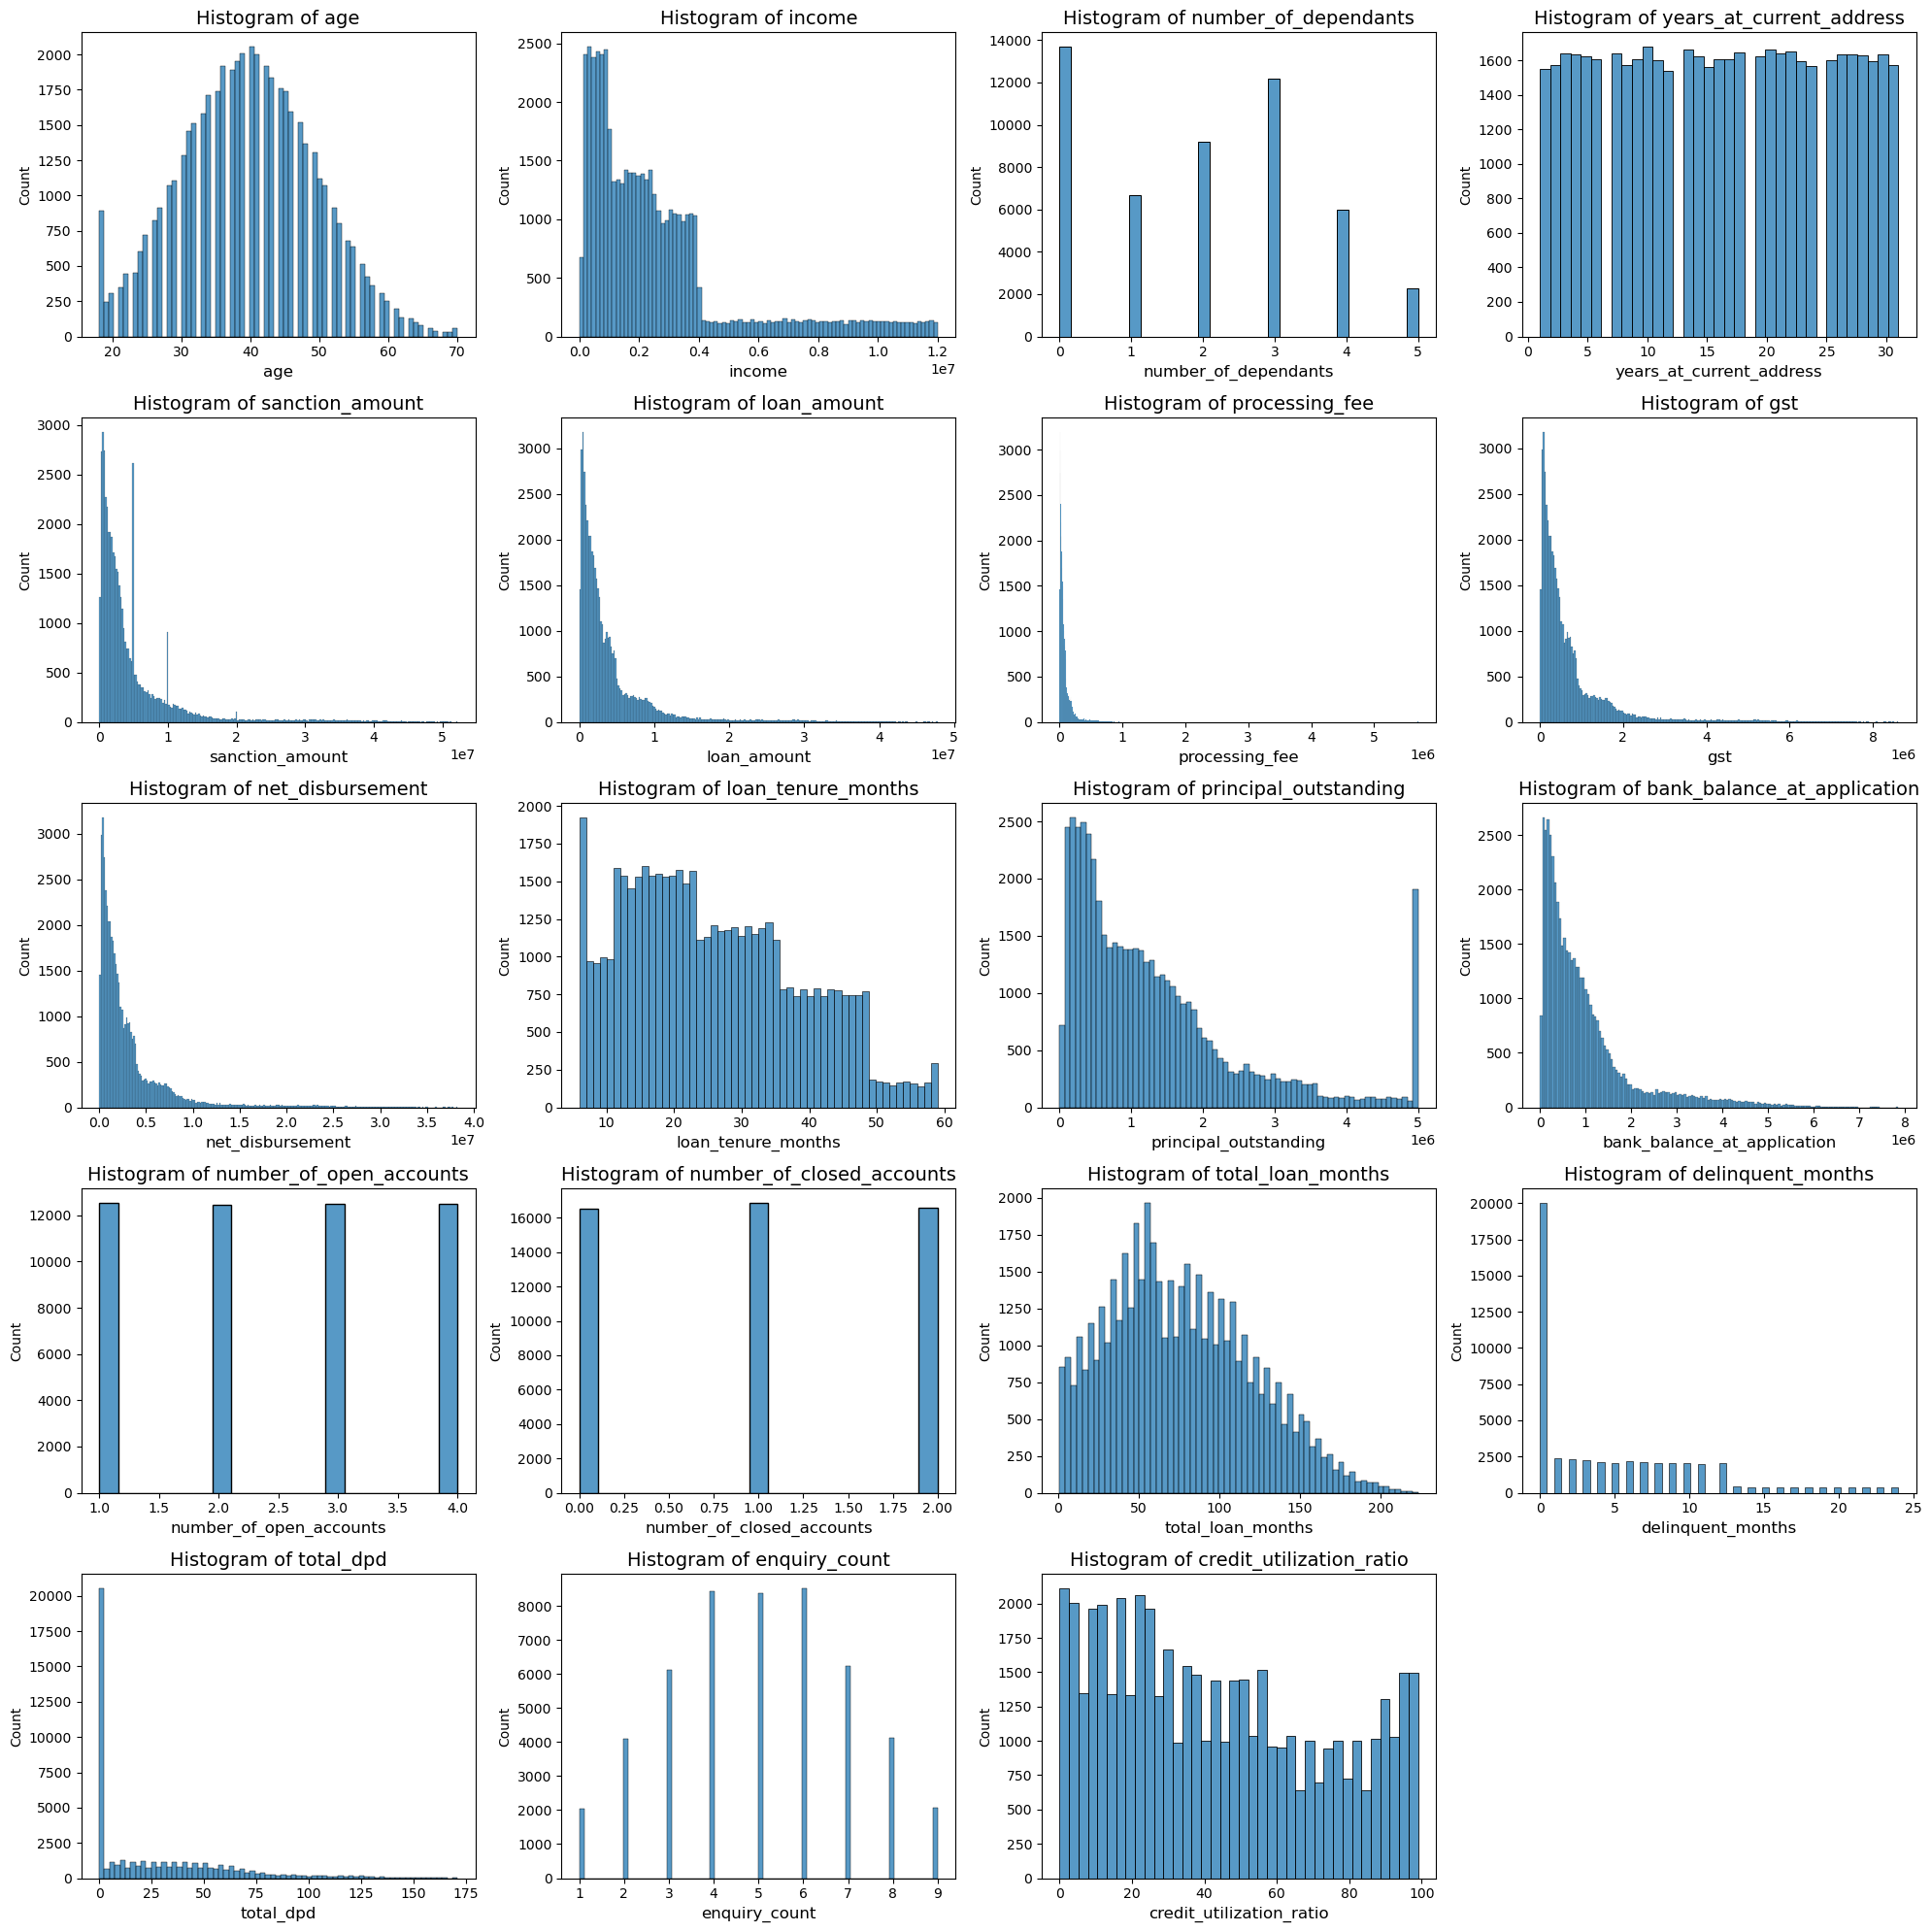

In [138]:
# Set up the figure size for better visualization
plt.figure(figsize=(20, 20))

# Determine the number of rows and columns for the subplots
n_cols = 4
n_rows = (len(columns_continuous) + n_cols - 1) // n_cols

# Loop through each column and create a boxplot
for i, column in enumerate(columns_continuous, start=1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=df[column])  # Adjusted to ensure compatibility with single-variable boxplots
    plt.title(f'Histogram of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)

plt.tight_layout()
plt.show()


### Outlier Removal: Processing Fee

In [139]:
df_train.processing_fee.describe()

count    3.750000e+04
mean     8.029068e+04
std      1.131281e+05
min      0.000000e+00
25%      1.922000e+04
50%      4.460000e+04
75%      9.242000e+04
max      5.293544e+06
Name: processing_fee, dtype: float64

In [140]:
# Here we are considering that generally the processing fee is about 3 % of the loan anount, hence we are retreiveing potential outliers where processing fee is too big than loan amount

df_train[(df_train.processing_fee / df_train.loan_amount) > 0.03][['loan_amount', 'processing_fee']]

,loan_amount,processing_fee
23981,2234000,2.669791e+06
28174,966000,1.214493e+06
47089,1738000,1.858965e+06
29305,2616000,3.036378e+06
9898,3626000,5.293544e+06


In [141]:
df_train_1= df_train[(df_train.processing_fee / df_train.loan_amount) < 0.03].copy()

In [142]:
df_train_1[(df_train_1.processing_fee / df_train_1.loan_amount) > 0.03][['loan_amount', 'processing_fee']]

,loan_amount,processing_fee


In [143]:
# Applying same thing to test data
df_test = df_test[df_test.processing_fee/df_test.loan_amount < 0.03].copy()
df_test.shape

(12497, 33)

### Analyze Categorical Columns

In [144]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [145]:
for col in columns_categorical:
    print(col, '-->', df_train_1[col].unique())

gender --> ['M' 'F']
marital_status --> ['Married' 'Single']
employment_status --> ['Self-Employed' 'Salaried']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state --> ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
zipcode --> [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
loan_purpose --> ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
default --> [0 1]


### Fix Errors in Loan Purpose Column

In [146]:
df_train_1['loan_purpose']= df_train_1['loan_purpose'].replace('Personaal', 'Personal')

In [147]:
df_test['loan_purpose']= df_test['loan_purpose'].replace('Personaal', 'Personal')

<h3 align= 'center', style = 'color:black'> Exploratory Data Analysis </h3>

In [148]:
columns_continuous

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

In [149]:
df_train_1.groupby("default")['age'].describe()

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,34265.0,39.767693,9.880235,18.0,33.0,40.0,46.0,70.0
1,3223.0,37.124729,9.290168,18.0,31.0,37.0,44.0,70.0


**Insights**

1. Average age in the default group is little less (37.12) than the average (39.7) of the group that did not default
1. Variability (standard deviation) is mostly similar in both the groups
1. Both the groups have similar min and max ages

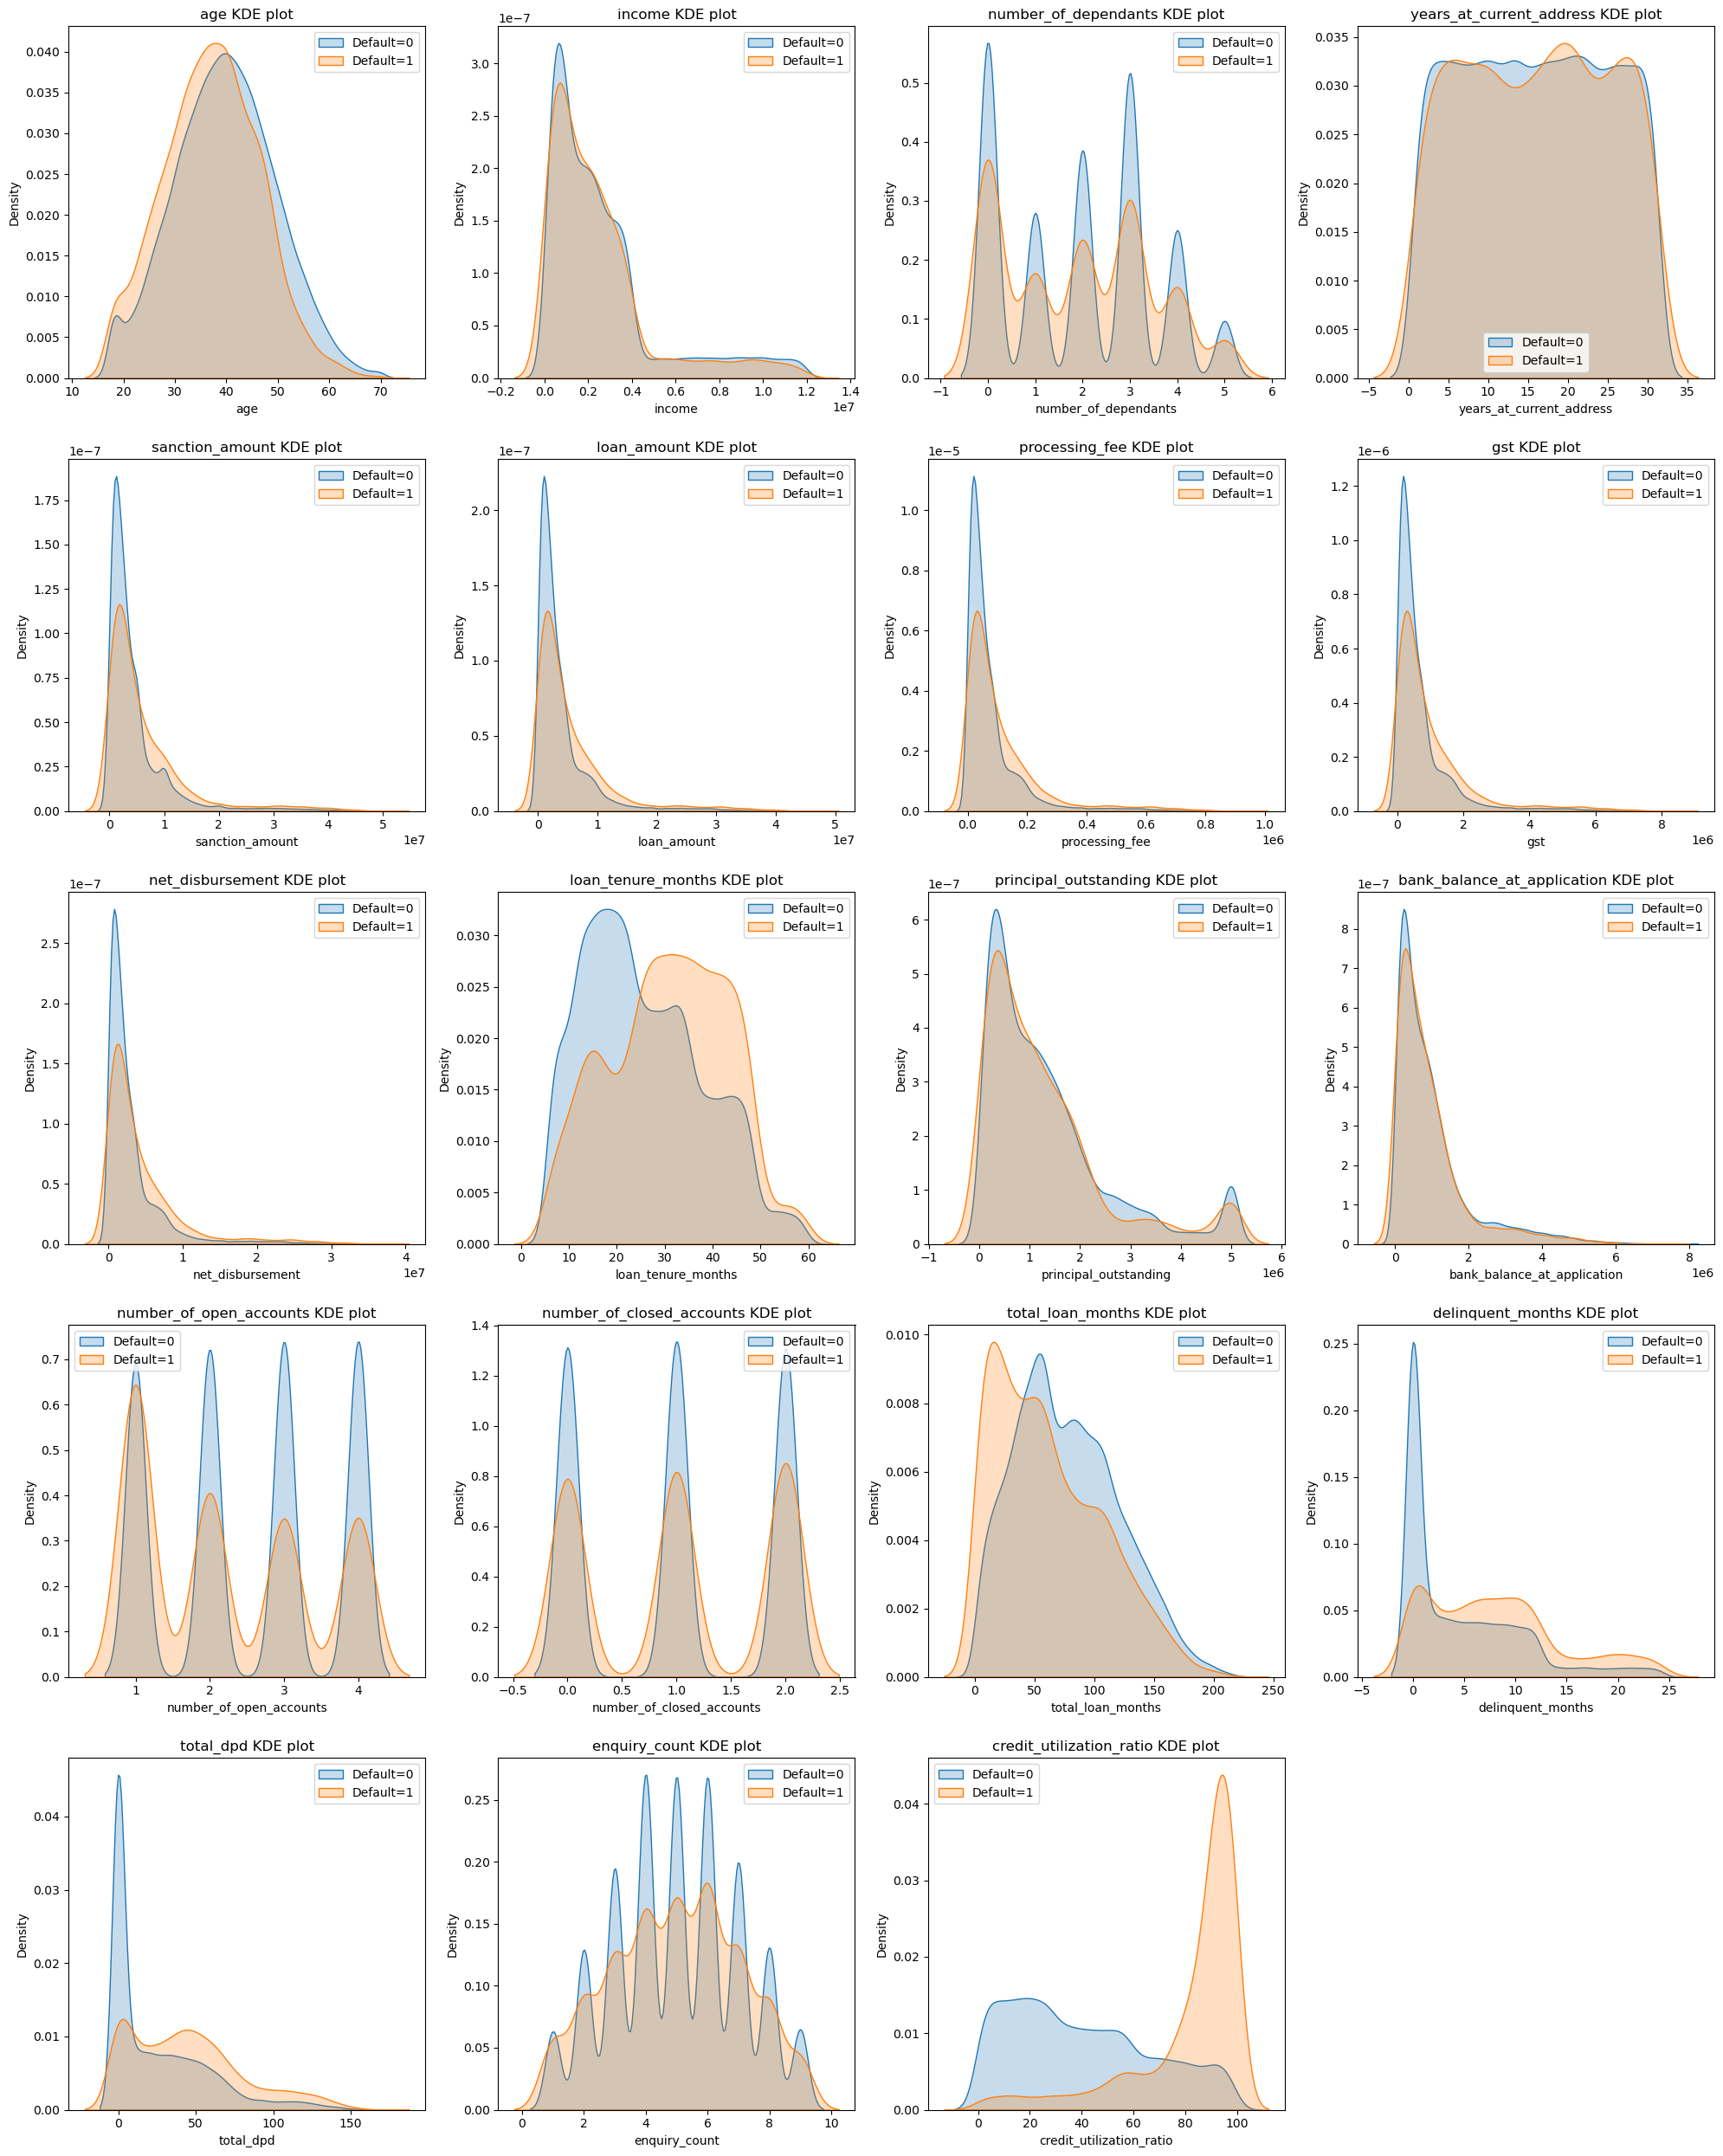

In [150]:
# Set up number of rows and columns for subplots
n_cols = 4
n_rows = (len(columns_continuous) + n_cols - 1) // n_cols

# Set the figure size
plt.figure(figsize=(20, n_rows * 5))

# Generate KDE plots for each continuous column
for i, column in enumerate(columns_continuous, start=1):
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(df_train_1[df_train_1.default == 0][column], fill=True, label="Default=0")
    sns.kdeplot(df_train_1[df_train_1.default == 1][column], fill=True, label="Default=1")
    plt.title(f"{column} KDE plot", fontsize=12)
    plt.legend()
    plt.xlabel(column, fontsize=10)
    plt.ylabel("Density", fontsize=10)

plt.tight_layout()
plt.show()

**Insights**
1. Age and Stability:
Middle-aged individuals with longer tenure at their current address are less likely to default.
Younger and older individuals show higher default probabilities.

2. Financial Indicators:
Higher income and sanctioned amounts reduce default likelihood.
Larger loans, higher processing fees, and GST values indicate increased risk.

3. Behavioral and Credit History:
High DPD values, delinquent months, and enquiry counts are strong predictors of default.
A higher number of closed accounts might reflect financial instability.

4. Loan Structure:
Shorter and very long tenures, combined with large outstanding principals, show elevated default risks.

5. Credit Utilization:
High utilization ratios (above 80%) are indicative of financial stress and a higher default probability.

6. Account Patterns:
A single open account or multiple closed accounts slightly increases default risk.

In columns: loan_tenure_months, delinquent_months, total_dpd, credit_utilization, higher values indicate high likelyhood of becoming a default. Hence these 4 looks like strong predictors
In remaining columns the distributions do not give any obvious insights
Why loan_amount and income did not give any signs of being strong predictors? May be when we combine these two and get loan to income ratio (LTI), that may have influence on the target variable. We will explore more later

<h3 style="color:black" align="center">Feature Engineering, Feature Selection</h3>

#### Generate Loan to Income (LTI) Ratio

In [166]:
df_train_1['loan_to_income']= round(df_train_1['loan_amount']/df_train_1['income'], 2)
df_test['loan_to_income']= round(df_test['loan_amount']/df_test['income'], 2)

df_train_1['loan_to_income'].describe()

count    37488.000000
mean         1.556711
std          0.973687
min          0.300000
25%          0.770000
50%          1.160000
75%          2.460000
max          4.570000
Name: loan_to_income, dtype: float64

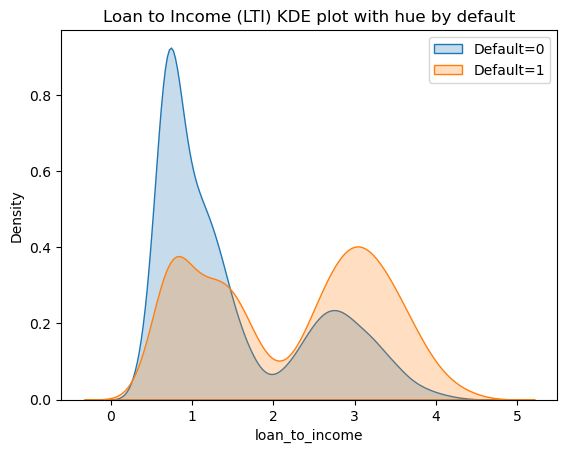

In [152]:
sns.kdeplot(df_train_1[df_train_1.default == 0]['loan_to_income'], fill=True, label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default == 1]['loan_to_income'], fill=True, label="Default=1")
plt.title(f"Loan to Income (LTI) KDE plot with hue by default")
plt.legend()
plt.show()

**Insights**
1. Blue graph has majority of its values on lower side of LTI
2. Orange graph has many values when LTI is higher indicating that higher LTI means high risk loan

#### Generate Delinquency Ratio

In [153]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income'],
      dtype='object')

In [154]:
df_train_1[['delinquent_months','total_loan_months']]

,delinquent_months,total_loan_months
12746,20,152
32495,10,160
43675,12,54
9040,0,76
13077,0,60
...,...,...
28515,0,40
5558,14,52
45236,11,130
49228,0,88


In [155]:
df_train_1['delinquency_ratio']= round(df_train_1['delinquent_months'] * 100/df_train_1['total_loan_months'], 2)
df_test['delinquency_ratio']= round(df_test['delinquent_months'] * 100/df_test['total_loan_months'], 2)

df_train_1[['delinquency_ratio', 'delinquent_months', 'total_loan_months']]

,delinquency_ratio,delinquent_months,total_loan_months
12746,13.16,20,152
32495,6.25,10,160
43675,22.22,12,54
9040,0.00,0,76
13077,0.00,0,60
...,...,...,...
28515,0.00,0,40
5558,26.92,14,52
45236,8.46,11,130
49228,0.00,0,88


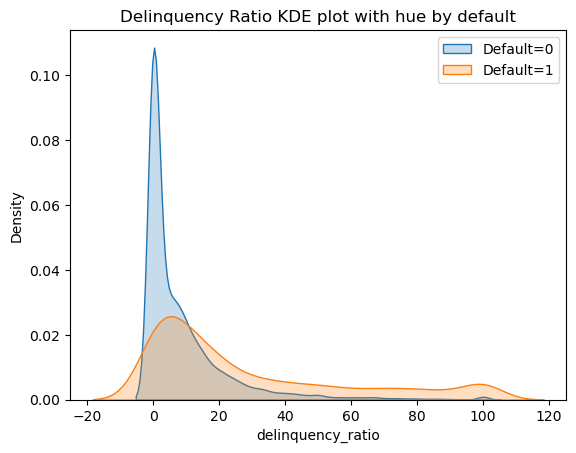

In [156]:
sns.kdeplot(df_train_1[df_train_1.default == 0]['delinquency_ratio'], fill=True, label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default == 1]['delinquency_ratio'], fill=True, label="Default=1")
plt.title(f"Delinquency Ratio KDE plot with hue by default")
plt.legend()
plt.show()

**Insights**
1. Blue graph has majority of its values on lower side of LTI
2. Orange graph has many values when delinquency ratio is higher indicating some correlation on default

#### Generate Avg DPD Per Delinquency

In [160]:
df_train_1['avg_dpd_per_delinquency']= np.where(
    df_train_1['delinquent_months']!= 0, 
    (df_train_1['total_dpd']/df_train_1['delinquent_months']).round(2),
    0
)

df_test['avg_dpd_per_delinquency'] = np.where(
    df_test['delinquent_months']!= 0, 
    (df_test['total_dpd']/df_test['delinquent_months']).round(2),
    0
)

In [161]:
df_train_1['avg_dpd_per_delinquency'].describe()

count    37488.000000
mean         3.284160
std          2.906722
min          0.000000
25%          0.000000
50%          4.330000
75%          5.742500
max         10.000000
Name: avg_dpd_per_delinquency, dtype: float64

In [162]:
df_train_1['avg_dpd_per_delinquency'].isna().sum()

0

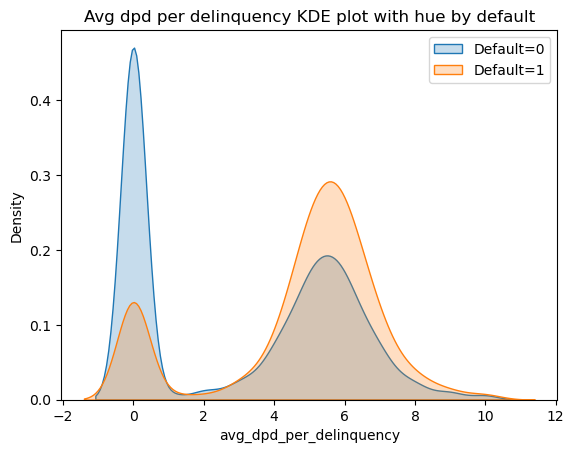

In [163]:
sns.kdeplot(df_train_1[df_train_1.default == 0]['avg_dpd_per_delinquency'], fill=True, label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default == 1]['avg_dpd_per_delinquency'], fill=True, label="Default=1")
plt.title(f"Avg dpd per delinquency KDE plot with hue by default")
plt.legend()
plt.show()

In [164]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

**Insights**

1. Graph clearly shows more occurances of default cases when avg_dpd_per_delinquency is high. This means this column is a strong predictor

### Remove columns that are just unique ids and don't have influence on target

In [165]:
df_train_2 = df_train_1.drop(['cust_id', 'loan_id'],axis="columns")
df_test = df_test.drop(['cust_id', 'loan_id'],axis="columns")

In [167]:
df_train_3 = df_train_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_test = df_test.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [168]:
df_train_3.select_dtypes(['int64', 'float64']).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

### VIF to measure multicolinearity

In [171]:
X_train = df_train_3.drop('default', axis='columns')
y_train = df_train_3['default']

cols_to_scale = X_train.select_dtypes(['int64', 'float64']).columns

scaler = MinMaxScaler()

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.00000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000
mean,0.414240,0.388903,0.499918,0.523517,0.088840,0.082513,0.082513,0.082513,0.376631,0.261615,0.123550,0.500925,0.50056,0.501077,0.438653,0.294312,0.103300,0.328416
std,0.189590,0.307182,0.297364,0.286491,0.120117,0.112480,0.112480,0.112480,0.234860,0.244461,0.133275,0.373040,0.40701,0.253666,0.296902,0.228030,0.172983,0.290672
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288462,0.000000,0.233333,0.325424,0.020555,0.018963,0.018963,0.018963,0.188679,0.077988,0.034205,0.000000,0.00000,0.375000,0.181818,0.110070,0.000000,0.000000
50%,0.403846,0.400000,0.500000,0.491525,0.049364,0.045516,0.045516,0.045516,0.339623,0.193870,0.082515,0.666667,0.50000,0.500000,0.393939,0.201405,0.036800,0.433000
75%,0.538462,0.600000,0.766667,0.762712,0.098027,0.095555,0.095555,0.095555,0.547170,0.352418,0.155192,1.000000,1.00000,0.625000,0.676768,0.505855,0.129500,0.574250
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [172]:
X_test = df_test.drop('default', axis='columns')
y_test = df_test['default']

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,delinquency_ratio,avg_dpd_per_delinquency,loan_to_income
count,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000
mean,0.415001,0.384892,0.502697,0.525015,0.089218,0.082800,0.082800,0.082800,0.375092,0.264632,0.124944,0.497293,0.500440,0.501470,0.436038,0.106077,0.333862,0.293038
std,0.188773,0.306871,0.298103,0.286179,0.120844,0.112877,0.112877,0.112877,0.233792,0.245290,0.134708,0.372576,0.407226,0.253618,0.295418,0.173082,0.289688,0.226176
min,0.000000,0.000000,0.000000,0.000000,-0.000019,-0.000126,-0.000126,-0.000126,0.000000,0.000163,0.000668,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288462,0.000000,0.233333,0.325424,0.020958,0.019387,0.019387,0.019387,0.188679,0.079715,0.034167,0.000000,0.000000,0.375000,0.181818,0.000000,0.000000,0.112412
50%,0.423077,0.400000,0.500000,0.510169,0.050189,0.046249,0.046249,0.046249,0.339623,0.198239,0.084024,0.333333,0.500000,0.500000,0.393939,0.042100,0.440000,0.201405
75%,0.538462,0.600000,0.766667,0.762712,0.097422,0.094927,0.094927,0.094927,0.547170,0.356914,0.157792,0.666667,1.000000,0.625000,0.676768,0.133900,0.575000,0.498829
max,1.000000,1.000000,1.000000,1.000000,0.981249,0.963717,0.963717,0.963717,1.000000,1.000000,0.939154,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.004684


In [173]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column']= data.columns
    vif_df['VIF']= [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

In [174]:
calculate_vif(X_train[cols_to_scale])

C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.700688
1,number_of_dependants,2.730311
2,years_at_current_address,3.422571
3,zipcode,3.797517
4,sanction_amount,101.086587
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.180526
9,principal_outstanding,16.326463


In [175]:
features_to_drop_vif = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement','principal_outstanding']

X_train_1 = X_train.drop(features_to_drop_vif, axis='columns')
numeric_columns = X_train_1.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [178]:
vif_df = calculate_vif(X_train_1[numeric_columns])
vif_df

,Column,VIF
0,age,5.429192
1,number_of_dependants,2.726773
2,years_at_current_address,3.403705
3,zipcode,3.777877
4,loan_tenure_months,6.018731
5,bank_balance_at_application,1.804695
6,number_of_open_accounts,4.353476
7,number_of_closed_accounts,2.372444
8,enquiry_count,6.384090
9,credit_utilization_ratio,2.919834


In [179]:
selected_numeric_features_vif = vif_df.Column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype=object)

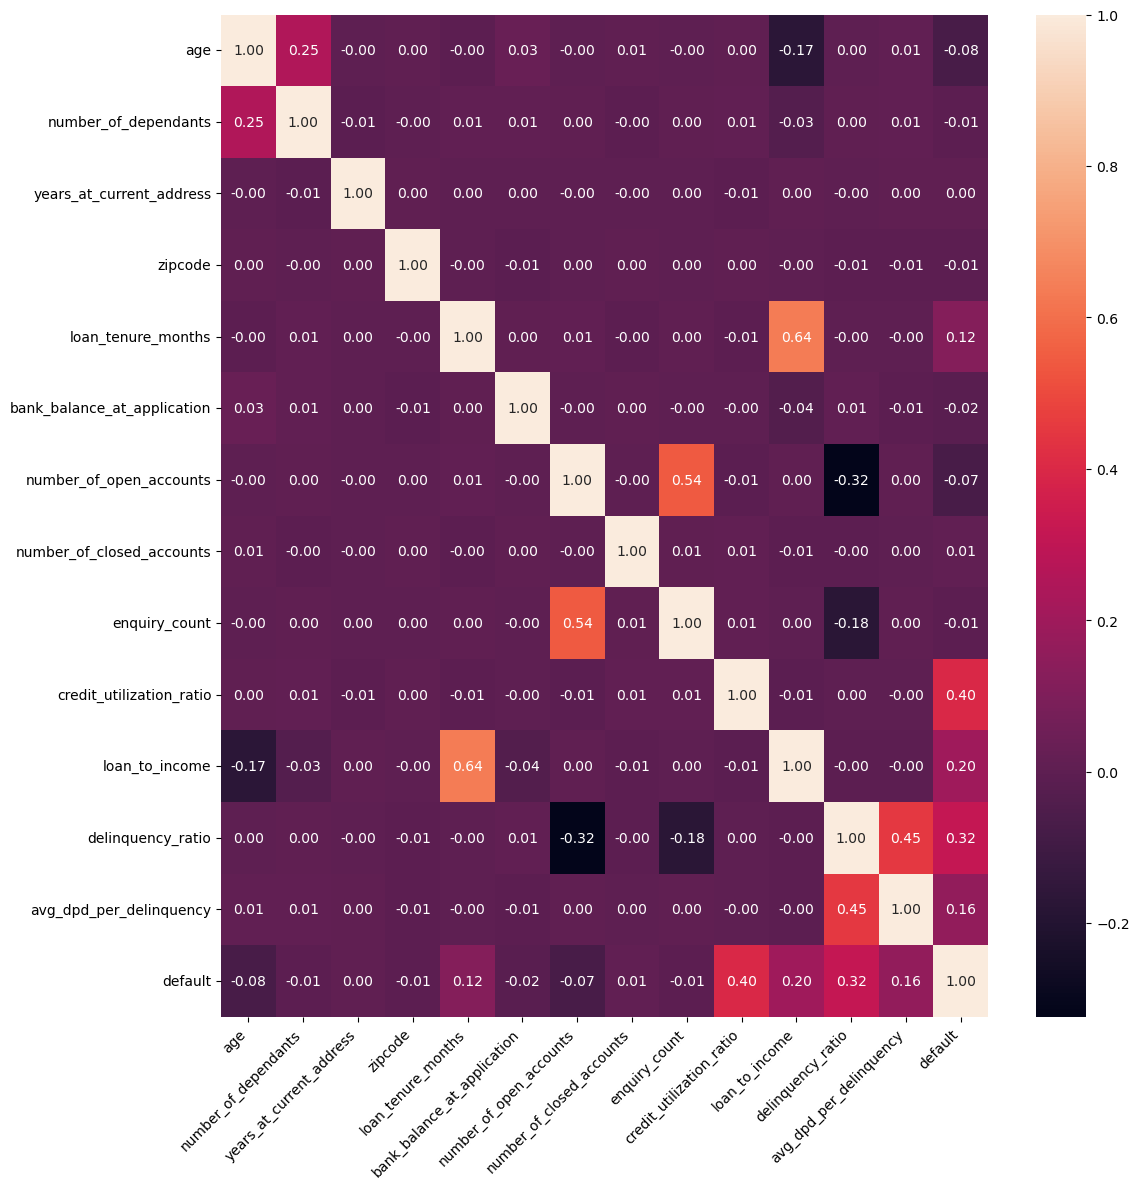

In [180]:
plt.figure(figsize=(12,12))
cm = df_train_3[numeric_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Feature Selection: Categorical Features

In [183]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

### Calculate Weight of Evidence (WOE) and Information Value (IV)

In [189]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
    grouped['bad']=grouped['total']-grouped['good']
    
    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()
    
    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad
    grouped['woe'] = np.log(grouped['good_pct']/ grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] -grouped['bad_pct'])*grouped['woe']
    
    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)
    
    total_iv = grouped['iv'].sum()
    
    return grouped, total_iv

grouped, total_iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), 'loan_purpose', 'default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7447,327,7120,0.101458,0.207792,-0.716891,0.076230
Education,5620,559,5061,0.173441,0.147702,0.160642,0.004135
Home,11304,1734,9570,0.538008,0.279294,0.655609,0.169616
Personal,13117,603,12514,0.187093,0.365212,-0.668874,0.119140


In [196]:
iv_values = {}
for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), feature, 'default')      
    else:
        X_binned = pd.cut(X_train_1[feature], bins= 10, labels= False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train],axis=1), feature, 'default')
    iv_values[feature] = iv

iv_values

{'age': 0.0890689462679479,
 'gender': 0.00047449502170914947,
 'marital_status': 0.001129766845390142,
 'employment_status': 0.003953046301722585,
 'number_of_dependants': 0.0019380899135053508,
 'residence_type': 0.246745268718145,
 'years_at_current_address': 0.0020800513608156363,
 'city': 0.0019059578709781529,
 'state': 0.0019005589806779287,
 'zipcode': 0.0016677413243392572,
 'loan_purpose': 0.3691197842282755,
 'loan_type': 0.16319324904149224,
 'loan_tenure_months': 0.21893515090196278,
 'bank_balance_at_application': 0.0063187993277516365,
 'number_of_open_accounts': 0.08463134083005877,
 'number_of_closed_accounts': 0.0011964272592421567,
 'enquiry_count': 0.007864214085342608,
 'credit_utilization_ratio': 2.352965568168245,
 'loan_to_income': 0.476415456948364,
 'delinquency_ratio': 0.716576108689321,
 'avg_dpd_per_delinquency': 0.40176623566177694}

In [197]:
iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.352966
19,delinquency_ratio,0.716576
18,loan_to_income,0.476415
20,avg_dpd_per_delinquency,0.401766
10,loan_purpose,0.369120
5,residence_type,0.246745
12,loan_tenure_months,0.218935
11,loan_type,0.163193
0,age,0.089069
14,number_of_open_accounts,0.084631


In [198]:
# select features that has IV > 0.02
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

### Feature Encoding

In [199]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [200]:
X_train_reduced.head()

,age,residence_type,loan_purpose,loan_type,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
12746,0.788462,Owned,Home,Secured,0.415094,1.000000,0.363636,0.414520,0.1316,0.590
32495,0.500000,Owned,Education,Secured,0.830189,0.666667,0.050505,0.306792,0.0625,0.620
43675,0.384615,Mortgage,Home,Secured,0.490566,0.000000,0.000000,0.758782,0.2222,0.558
9040,0.461538,Mortgage,Education,Secured,0.641509,0.666667,0.878788,0.194379,0.0000,0.000
13077,0.769231,Owned,Personal,Unsecured,0.169811,0.000000,0.717172,0.046838,0.0000,0.000


In [202]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first = True)
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first = True)

X_train_encoded.head()

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12746,0.788462,0.415094,1.000000,0.363636,0.414520,0.1316,0.590,True,False,False,True,False,False
32495,0.500000,0.830189,0.666667,0.050505,0.306792,0.0625,0.620,True,False,True,False,False,False
43675,0.384615,0.490566,0.000000,0.000000,0.758782,0.2222,0.558,False,False,False,True,False,False
9040,0.461538,0.641509,0.666667,0.878788,0.194379,0.0000,0.000,False,False,True,False,False,False
13077,0.769231,0.169811,0.000000,0.717172,0.046838,0.0000,0.000,True,False,False,False,True,True


<h3 align="center" style="color:black">Model Training</h3>

### Attempt 1

1. Logistic Regression, RandomForest & XGB
1. No handling of class imbalance

In [209]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.72      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.86      0.88     12497
weighted avg       0.96      0.96      0.96     12497



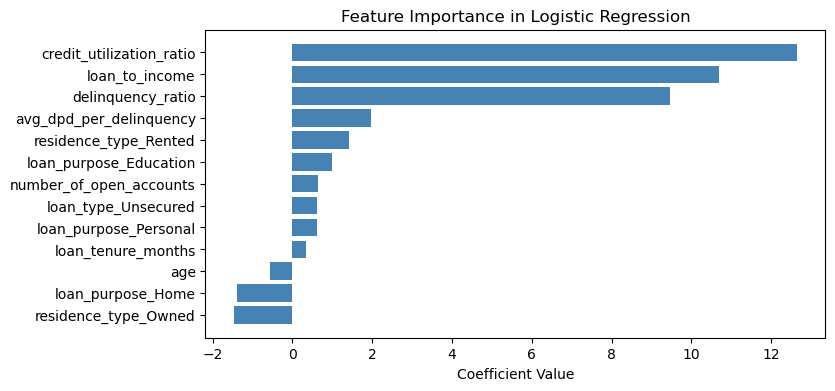

In [210]:
feature_importance = model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

In [206]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.86      0.71      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.92      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [207]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.83      0.76      0.79      1074

    accuracy                           0.97     12497
   macro avg       0.90      0.87      0.89     12497
weighted avg       0.96      0.97      0.96     12497



Since there is not much difference between XGB and Logistic, we will choose LogisticRegression as a candidate for our RandomizedSearchCV candidate it has a better interpretation.

#### RandomizedSearch CV for Attempt 1: Logistic Regression

In [211]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'newton-cg', 'C': 545.5594781168514}
Best Score: 0.7578884658937152
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11423
           1       0.83      0.74      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.90      0.86      0.88     12497
weighted avg       0.96      0.96      0.96     12497



#### RandomizedSearch CV for Attempt 1: XGBoost

In [212]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'reg_lambda': 1.0, 'reg_alpha': 5.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Score: 0.7878581960738732
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.77      0.84      0.80      1074

    accuracy                           0.96     12497
   macro avg       0.88      0.91      0.89     12497
weighted avg       0.97      0.96      0.97     12497



### Attempt 2

1. Logistic Regression & XGB
1. Handle Class Imbalance Using Under Sampling

In [214]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state= 42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_encoded, y_train)
y_train_rus.value_counts()

default
0    3223
1    3223
Name: count, dtype: int64

In [216]:
model = LogisticRegression()
model.fit(X_train_rus, y_train_rus)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.95      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.93      0.81     12497
weighted avg       0.95      0.92      0.93     12497



In [218]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_rus, y_train_rus)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.99      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.95      0.81     12497
weighted avg       0.96      0.92      0.93     12497



### Attempt 3

1. Logistic Regression
1. Handle Class Imbalance Using SMOTE Tomek
1. Parameter tunning using optuna

In [219]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state = 42)
X_train_smt , y_train_smt = smt.fit_resample(X_train_encoded, y_train)
y_train_smt.value_counts()

default
0    34199
1    34199
Name: count, dtype: int64

In [221]:
model = LogisticRegression()
model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.55      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [222]:
!pip install optuna

In [223]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

In [224]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }

    model = LogisticRegression(**param, max_iter=10000)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2025-01-03 14:20:33,724] A new study created in memory with name: no-name-ac0dae1c-8dc6-4840-8809-6f4d22ec8748
[I 2025-01-03 14:20:36,555] Trial 0 finished with value: 0.9155932450636094 and parameters: {'C': 0.061821115134186574, 'solver': 'lbfgs', 'tol': 0.011320289878584383, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9155932450636094.
[I 2025-01-03 14:20:37,888] Trial 1 finished with value: 0.9457002867373778 and parameters: {'C': 139.95307357073673, 'solver': 'newton-cg', 'tol': 6.667215834323603e-05, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.9457002867373778.
[I 2025-01-03 14:20:39,245] Trial 2 finished with value: 0.9456710940877812 and parameters: {'C': 505.87322920709784, 'solver': 'liblinear', 'tol': 2.7923385174575238e-06, 'class_weight': None}. Best is trial 1 with value: 0.9457002867373778.
[I 2025-01-03 14:20:40,446] Trial 3 finished with value: 0.9107158803747243 and parameters: {'C': 0.0050149074108540755, 'solver': 'liblinear', 'tol':

In [225]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9459910271272344
  Params: 
    C: 2.744965257143818
    solver: lbfgs
    tol: 2.413470266952705e-06
    class_weight: None
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



### Attempt 4

1. XGBoost
1. Handle Class Imbalance Using SMOTE Tomek
1. Parameter tunning using optuna

In [226]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2025-01-03 14:23:50,368] A new study created in memory with name: no-name-40735d25-9ca6-4c92-b9f5-be26e0918db6
[I 2025-01-03 14:23:50,882] Trial 0 finished with value: 0.9497901187572634 and parameters: {'lambda': 4.818379333219112, 'alpha': 6.769606141182288, 'subsample': 0.7014435271342081, 'colsample_bytree': 0.6401628002974861, 'max_depth': 4, 'eta': 0.23372709353750512, 'gamma': 9.713242195946865, 'scale_pos_weight': 9.028642850210685, 'min_child_weight': 2, 'max_delta_step': 7}. Best is trial 0 with value: 0.9497901187572634.
[I 2025-01-03 14:23:51,594] Trial 1 finished with value: 0.9735863576207987 and parameters: {'lambda': 0.40947949579229415, 'alpha': 0.08110011310059691, 'subsample': 0.42056143545258284, 'colsample_bytree': 0.8927722242845154, 'max_depth': 8, 'eta': 0.29671285803732855, 'gamma': 0.6386214318420991, 'scale_pos_weight': 4.30029640684849, 'min_child_weight': 5, 'max_delta_step': 1}. Best is trial 1 with value: 0.9735863576207987.
[I 2025-01-03 14:23:52,111]

In [227]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9758854414362664
  Params: 
    lambda: 0.8439835837666164
    alpha: 0.39763204521217455
    subsample: 0.5686393762205385
    colsample_bytree: 0.4862582373654435
    max_depth: 10
    eta: 0.2745239556124747
    gamma: 0.010084348067452148
    scale_pos_weight: 2.091576216737087
    min_child_weight: 3
    max_delta_step: 4
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11423
           1       0.72      0.86      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.85      0.91      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [228]:
y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



## Model Evaluation : ROC/AUC

In [233]:
from sklearn.metrics import roc_curve
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]

fpr, tpr, thresholds= roc_curve(y_test, probabilities)
fpr[:10], tpr[:10], thresholds[:10]

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.75426771e-05,
        8.75426771e-05, 1.75085354e-04, 1.75085354e-04, 2.62628031e-04,
        2.62628031e-04, 3.50170708e-04]),
 array([0.        , 0.0009311 , 0.16201117, 0.16201117, 0.17877095,
        0.17877095, 0.21787709, 0.21787709, 0.22905028, 0.22905028]),
 array([       inf, 1.        , 0.99942267, 0.99941134, 0.99927065,
        0.99926828, 0.99870914, 0.99868916, 0.9984158 , 0.99835767]))

In [234]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area

0.9836809527512447

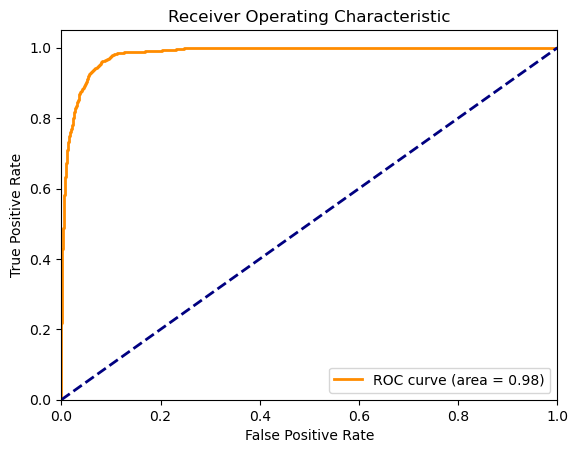

In [235]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Model Evaluation : Rankordering, KS statistic, Gini coeff

In [243]:
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]

df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probabilities
    })
df_eval.head()

,Default Truth,Default Probability
19205,0,0.536107
15514,0,0.000013
30367,0,0.005867
35347,0,0.006932
41814,1,0.922634


In [244]:
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')
df_eval.head(3)

,Default Truth,Default Probability,Decile
19205,0,0.536107,8
15514,0,0.000013,2
30367,0,0.005867,6


In [245]:
df_eval[df_eval.Decile==8]['Default Probability'].describe()

count    1250.000000
mean        0.485682
std         0.181313
min         0.215818
25%         0.317256
50%         0.467550
75%         0.640196
max         0.818159
Name: Default Probability, dtype: float64

In [246]:
df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),    
}))
df_decile.reset_index(inplace=True)
df_decile

C:\Users\aksha\AppData\Local\Temp\ipykernel_29828\4037021561.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({


,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,0,1.527856e-09,8.636872e-07,0.0,1250.0
1,1,8.671218e-07,6.564632e-06,0.0,1250.0
2,2,6.565389e-06,3.266690e-05,0.0,1249.0
3,3,3.271355e-05,1.646392e-04,0.0,1250.0
4,4,1.647076e-04,8.170432e-04,0.0,1250.0
5,5,8.181560e-04,4.567156e-03,0.0,1249.0
6,6,4.568554e-03,2.990331e-02,5.0,1245.0
7,7,2.996106e-02,2.156646e-01,10.0,1239.0
8,8,2.158177e-01,8.181591e-01,162.0,1088.0
9,9,8.186348e-01,1.000000e+00,897.0,353.0


In [247]:
df_decile['Event Rate'] = df_decile['Events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile['Non-event Rate'] = df_decile['Non-events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,0,1.527856e-09,8.636872e-07,0.0,1250.0,0.000000,100.000000
1,1,8.671218e-07,6.564632e-06,0.0,1250.0,0.000000,100.000000
2,2,6.565389e-06,3.266690e-05,0.0,1249.0,0.000000,100.000000
3,3,3.271355e-05,1.646392e-04,0.0,1250.0,0.000000,100.000000
4,4,1.647076e-04,8.170432e-04,0.0,1250.0,0.000000,100.000000
5,5,8.181560e-04,4.567156e-03,0.0,1249.0,0.000000,100.000000
6,6,4.568554e-03,2.990331e-02,5.0,1245.0,0.400000,99.600000
7,7,2.996106e-02,2.156646e-01,10.0,1239.0,0.800641,99.199359
8,8,2.158177e-01,8.181591e-01,162.0,1088.0,12.960000,87.040000
9,9,8.186348e-01,1.000000e+00,897.0,353.0,71.760000,28.240000


In [248]:
df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,9,8.186348e-01,1.000000e+00,897.0,353.0,71.760000,28.240000
1,8,2.158177e-01,8.181591e-01,162.0,1088.0,12.960000,87.040000
2,7,2.996106e-02,2.156646e-01,10.0,1239.0,0.800641,99.199359
3,6,4.568554e-03,2.990331e-02,5.0,1245.0,0.400000,99.600000
4,5,8.181560e-04,4.567156e-03,0.0,1249.0,0.000000,100.000000
5,4,1.647076e-04,8.170432e-04,0.0,1250.0,0.000000,100.000000
6,3,3.271355e-05,1.646392e-04,0.0,1250.0,0.000000,100.000000
7,2,6.565389e-06,3.266690e-05,0.0,1249.0,0.000000,100.000000
8,1,8.671218e-07,6.564632e-06,0.0,1250.0,0.000000,100.000000
9,0,1.527856e-09,8.636872e-07,0.0,1250.0,0.000000,100.000000


In [249]:
df_decile['Cum Events'] =  df_decile['Events'].cumsum()
df_decile['Cum Non-events'] =  df_decile['Non-events'].cumsum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events
0,9,8.186348e-01,1.000000e+00,897.0,353.0,71.760000,28.240000,897.0,353.0
1,8,2.158177e-01,8.181591e-01,162.0,1088.0,12.960000,87.040000,1059.0,1441.0
2,7,2.996106e-02,2.156646e-01,10.0,1239.0,0.800641,99.199359,1069.0,2680.0
3,6,4.568554e-03,2.990331e-02,5.0,1245.0,0.400000,99.600000,1074.0,3925.0
4,5,8.181560e-04,4.567156e-03,0.0,1249.0,0.000000,100.000000,1074.0,5174.0
5,4,1.647076e-04,8.170432e-04,0.0,1250.0,0.000000,100.000000,1074.0,6424.0
6,3,3.271355e-05,1.646392e-04,0.0,1250.0,0.000000,100.000000,1074.0,7674.0
7,2,6.565389e-06,3.266690e-05,0.0,1249.0,0.000000,100.000000,1074.0,8923.0
8,1,8.671218e-07,6.564632e-06,0.0,1250.0,0.000000,100.000000,1074.0,10173.0
9,0,1.527856e-09,8.636872e-07,0.0,1250.0,0.000000,100.000000,1074.0,11423.0


In [250]:
df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events']*100 / df_decile['Non-events'].sum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
0,9,8.186348e-01,1.000000e+00,897.0,353.0,71.760000,28.240000,897.0,353.0,83.519553,3.090257
1,8,2.158177e-01,8.181591e-01,162.0,1088.0,12.960000,87.040000,1059.0,1441.0,98.603352,12.614900
2,7,2.996106e-02,2.156646e-01,10.0,1239.0,0.800641,99.199359,1069.0,2680.0,99.534451,23.461437
3,6,4.568554e-03,2.990331e-02,5.0,1245.0,0.400000,99.600000,1074.0,3925.0,100.000000,34.360501
4,5,8.181560e-04,4.567156e-03,0.0,1249.0,0.000000,100.000000,1074.0,5174.0,100.000000,45.294581
5,4,1.647076e-04,8.170432e-04,0.0,1250.0,0.000000,100.000000,1074.0,6424.0,100.000000,56.237416
6,3,3.271355e-05,1.646392e-04,0.0,1250.0,0.000000,100.000000,1074.0,7674.0,100.000000,67.180250
7,2,6.565389e-06,3.266690e-05,0.0,1249.0,0.000000,100.000000,1074.0,8923.0,100.000000,78.114331
8,1,8.671218e-07,6.564632e-06,0.0,1250.0,0.000000,100.000000,1074.0,10173.0,100.000000,89.057165
9,0,1.527856e-09,8.636872e-07,0.0,1250.0,0.000000,100.000000,1074.0,11423.0,100.000000,100.000000


In [251]:
df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
0,9,8.186348e-01,1.000000e+00,897.0,353.0,71.760000,28.240000,897.0,353.0,83.519553,3.090257,80.429297
1,8,2.158177e-01,8.181591e-01,162.0,1088.0,12.960000,87.040000,1059.0,1441.0,98.603352,12.614900,85.988452
2,7,2.996106e-02,2.156646e-01,10.0,1239.0,0.800641,99.199359,1069.0,2680.0,99.534451,23.461437,76.073013
3,6,4.568554e-03,2.990331e-02,5.0,1245.0,0.400000,99.600000,1074.0,3925.0,100.000000,34.360501,65.639499
4,5,8.181560e-04,4.567156e-03,0.0,1249.0,0.000000,100.000000,1074.0,5174.0,100.000000,45.294581,54.705419
5,4,1.647076e-04,8.170432e-04,0.0,1250.0,0.000000,100.000000,1074.0,6424.0,100.000000,56.237416,43.762584
6,3,3.271355e-05,1.646392e-04,0.0,1250.0,0.000000,100.000000,1074.0,7674.0,100.000000,67.180250,32.819750
7,2,6.565389e-06,3.266690e-05,0.0,1249.0,0.000000,100.000000,1074.0,8923.0,100.000000,78.114331,21.885669
8,1,8.671218e-07,6.564632e-06,0.0,1250.0,0.000000,100.000000,1074.0,10173.0,100.000000,89.057165,10.942835
9,0,1.527856e-09,8.636872e-07,0.0,1250.0,0.000000,100.000000,1074.0,11423.0,100.000000,100.000000,0.000000


To assess whether rank ordering is followed, we should look at whether higher deciles (those with higher predicted probabilities) have higher event rates compared to lower deciles. Rank ordering means that as you move from the top decile to the bottom decile, the event rate should generally decrease.

Non-Events - termed as good (customers) who do not default. Events - termed as bad (customers) who default.

Events and Non-Events terms are interchanged based on usecase to usecase.

eg: for marketing usecase, which customer to reach out (who will take loan based on offers) will be events - here it will termed as good, and the customers who will not take loans will be non-events (bad).

**Insights from the Decile Table**

1. Top Deciles

* The first decile (Decile 9) has a high event rate of 72.00% and a non-event rate of 28.00%. This indicates that the model is highly confident in predicting events in this decile.
* The second decile (Decile 8) also shows a significant event rate of 12.72%, with a cumulative event rate reaching 98.6%.

2. Middle Deciles:

* Deciles 7 and 6 show a significant drop in event rates

3. Lower Deciles:

* Deciles 5 to 0 show zero events, with all predictions being non-events. These deciles collectively have a non-event rate of 100%.

4. KS Statistic:

* The KS statistic, which is the maximum difference between cumulative event rates and cumulative non-event rates, is highest at Decile 8 with a value of 85.98%. This suggests that the model performs best at distinguishing between events and non-events up to this decile.

* The KS value gradually decreases in the following deciles, indicating a decrease in model performance for distinguishing between events and non-events.

**KS Value**

The highest KS value is 85.98%, found at Decile 8. This indicates that the model's performance in distinguishing between events and non-events is most significant at this decile. (If KS is in top 3 decile and score above 40, it is considered a good predictive model.)

In [252]:
gini_coefficient = 2 * area - 1

print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)

AUC: 0.9836809527512447
Gini Coefficient: 0.9673619055024893


AUC of 0.98: The model is very good at distinguishing between events and non-events.

Gini coefficient of 0.96: This further confirms that the model is highly effective in its predictions, with almost perfect rank ordering capability.

The Gini coefficient ranges from -1 to 1, where a value closer to 1 signifies a perfect model, 0 indicates a model with no discriminative power, and -1 signifies a perfectly incorrect model.

#### Finalize The Model and Visualize Feature Importance

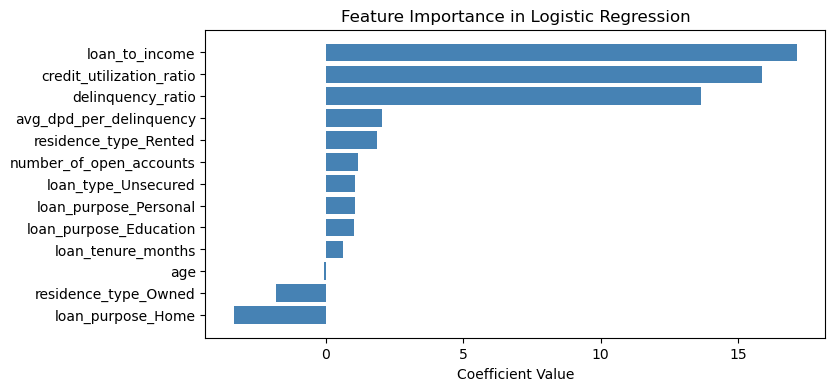

In [254]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

### Save the Model

In [255]:
X_test_encoded.head(2)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
19205,0.346154,0.754717,0.333333,0.989899,0.550351,0.0,0.0,True,False,False,True,False,False
15514,0.480769,0.226415,1.000000,0.323232,0.220141,0.0,0.0,True,False,True,False,False,False


In [256]:
X_test_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [257]:
cols_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [258]:
X_train_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [260]:
from joblib import dump

model_data = {
    'model': final_model,
    'features': X_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(model_data, 'artifacts/model_data.joblib')

['artifacts/model_data.joblib']

In [261]:
final_model.coef_, final_model.intercept_

(array([[-0.064521  ,  0.61189524,  1.17322426, 15.85451003, 17.15405185,
         13.64762024,  2.03987928, -1.83533558,  1.84402724,  1.01709742,
         -3.3610481 ,  1.04232838,  1.04232838]]),
 array([-20.62460169]))